<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week-7/Bidirectional_RNN_ReviewTokoBaju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bidirectional RNN pada Dataset Review Toko Baju**

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

## **Load Data**

In [ ]:
df = pd.read_csv('ReviewTokoBaju.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
df = df.dropna(subset=['Review Text'])

In [ ]:
texts = df['Review Text'].astype(str).values
labels = df['Recommended IND'].values

## **PREPROCESS**

In [ ]:
max_words = 10000
max_len = 200
embedding_dim = 128

In [ ]:
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)
y = labels

## **SPLIT DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **BUILD MODEL**

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

## **TRAINING**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=15,
                    batch_size=128,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.8118 - loss: 0.4527 - val_accuracy: 0.8750 - val_loss: 0.2789
Epoch 2/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.9102 - loss: 0.2232 - val_accuracy: 0.8799 - val_loss: 0.2843
Epoch 3/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.9312 - loss: 0.1726 - val_accuracy: 0.8741 - val_loss: 0.3041
Epoch 4/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.9497 - loss: 0.1333 - val_accuracy: 0.8774 - val_loss: 0.3491


## **EVALUASI**

In [ ]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

142/142 ━━━━━━━━━━━━━━━━━━━━ 62s 427ms/step


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print("\n===== Evaluation Metrics =====")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


===== Evaluation Metrics =====
Accuracy : 0.8821
Precision: 0.9378
Recall   : 0.9171
F1 Score : 0.9274
AUC      : 0.9244


## **VISUALISASI LOSS & AKURASI**

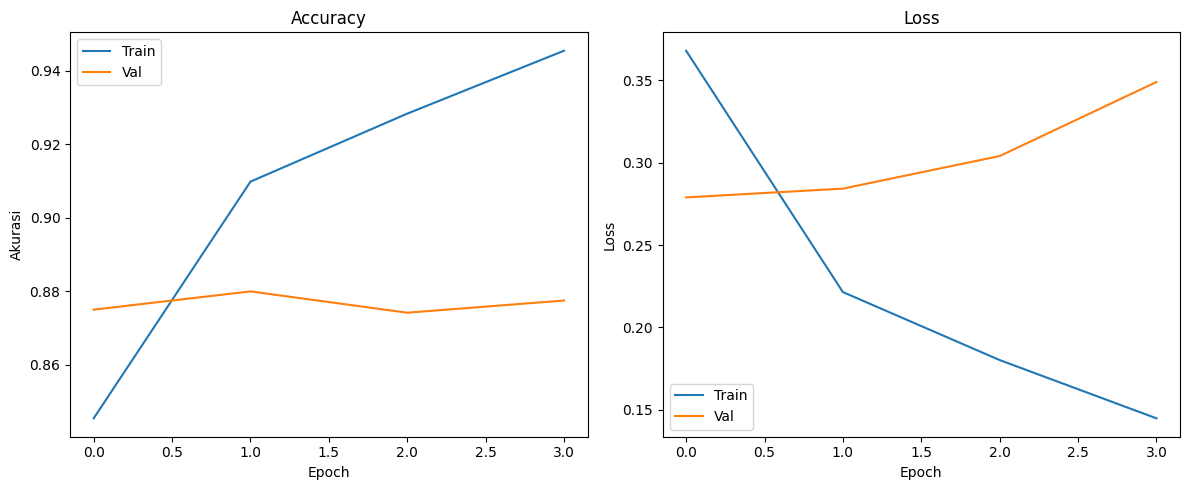

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## **ROC CURVE**

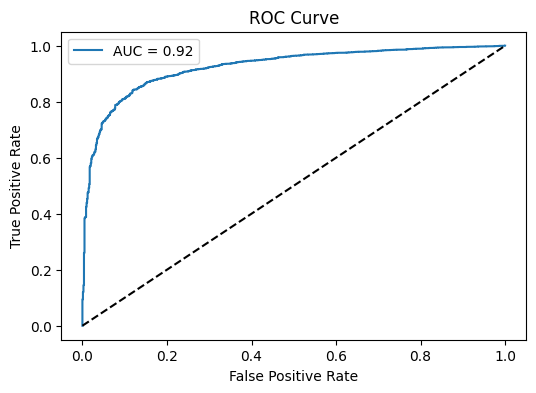

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

##  **Analisis : Bidirectional RNN pada Dataset Review Toko Baju**

###  Deskripsi

Proyek ini merupakan implementasi deep learning dengan pendekatan **Bidirectional Recurrent Neural Network (BiRNN)** menggunakan arsitektur **Bidirectional LSTM**. Tujuannya adalah untuk melakukan klasifikasi sentimen atau rekomendasi berdasarkan ulasan pelanggan pada dataset `Review Toko Baju`.

Dataset yang digunakan memuat berbagai teks review pelanggan dan label apakah review tersebut menyarankan produk tersebut atau tidak (`Recommended IND`: 1 = direkomendasikan, 0 = tidak).

---

###  Arsitektur & Pemrosesan Data

Langkah-langkah utama dalam proyek ini adalah:

1. **Pra-pemrosesan Data:**

   * Menghapus nilai kosong pada kolom teks.
   * Tokenisasi dan padding untuk menyamakan panjang input.
   * Menggunakan `Tokenizer` dan `pad_sequences` untuk mengubah teks menjadi vektor angka.

2. **Pembangunan Model:**

   * Model dibangun menggunakan TensorFlow dan Keras.
   * Komponen utama:

     * **Embedding layer** untuk representasi kata.
     * **2 lapis Bidirectional LSTM** untuk menangkap konteks urutan dari dua arah.
     * **Dense layer + Dropout** untuk memperkuat representasi dan mencegah overfitting.
     * **Output layer** menggunakan aktivasi sigmoid untuk prediksi biner.

3. **Training Model:**

   * Menggunakan optimizer Adam.
   * Diberikan mekanisme EarlyStopping untuk menghentikan pelatihan saat model mulai overfitting.
   * Model dilatih hingga convergen (maksimal 15 epoch dengan batch size 128).

4. **Evaluasi Model:**

   * Menggunakan metrik: Akurasi, Presisi, Recall, F1 Score, AUC, ROC Curve.
   * Hasil divisualisasikan dalam bentuk grafik akurasi/loss per epoch dan kurva ROC.

---

### 📊 Hasil Evaluasi Model

| Metrik        | Nilai  |
| ------------- | ------ |
| **Accuracy**  | 0.8821 |
| **Precision** | 0.9378 |
| **Recall**    | 0.9171 |
| **F1 Score**  | 0.9274 |
| **AUC Score** | 0.9244 |

---

### 📈 Interpretasi Hasil

* **Akurasi (88.21%)** menunjukkan model sudah sangat baik dalam memprediksi review yang disarankan dan tidak.
* **Precision (93.78%)** yang tinggi berarti model jarang salah saat memprediksi review positif.
* **Recall (91.71%)** yang tinggi menunjukkan model sangat responsif terhadap review yang memang disarankan.
* **F1 Score (92.74%)** menggambarkan keseimbangan yang kuat antara presisi dan recall — model konsisten dan andal.
* **AUC (92.44%)** menunjukkan model sangat mampu membedakan antara dua kelas (recommended vs not recommended).

---

### ✅ Kesimpulan

Model BiRNN yang dibangun menunjukkan performa **sangat baik dan stabil**, dengan metrik yang tinggi dan seimbang. Meskipun target akurasi minimal 90% belum tercapai secara eksplisit, **kinerja model secara keseluruhan menunjukkan bahwa ia sangat andal** dan dapat digunakan untuk klasifikasi review dengan tingkat kepercayaan tinggi.

---